In [138]:
import copy
import json
import pandas as pd
import numpy as np
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [139]:
with open('conversations.json', 'r') as f:
    conversations = json.load(f)
conversations

[["What's good lucky number for today?",
  'Why do Fibonacci numbers occur on so many different occasions in both mathematics and the real world?',
  'Please tell me what the maximum thickness is for a M.2 ssd in a Lenovo Thinkpad (P1 Gen2). Can I squeeze a 3.58mm in there?',
  "Hi Open Assistant, let's play a game of chess! I will play as white and you will play as black.\n\n1. e4",
  "Sandy sells sea shells by the sea shore. Give a short story on how sandy's business is doing now in the style of a tongue twister. If that's too hard then just make use of a lot of alliteration in the story.",
  'I have a hobby interest in linguistics, but have no intention of studying it at a University. \nWhat are some good ways to build a solid foundation in that field?'],
 ["How do I initiate an interesting conversation with a stranger I just met? For example, when I'm sitting next to them on the plane?",
  'when you put a water bottle into a freezer, an let it sit there without touching it, sometim

In [8]:
data = []
for conv in conversations:
    data_conv = []
    for prompt in conv:
        tokens = nltk.word_tokenize(prompt)
        text = nltk.Text(tokens)
        tags = nltk.pos_tag(tokens)
        data_conv.append({
            'prompt': prompt,
            'tokens': tokens,
            'text': text,
            'tags': tags,
        })
    data.append(data_conv)

In [29]:
from collections import Counter

counters = []
for conv in data:
    for prompt in conv:
        counters.append(Counter(tag for word, tag in prompt['tags']))

print(counters)
d = dict(sum(counters, Counter()))


[Counter({'JJ': 2, 'NN': 2, 'WP': 1, 'VBZ': 1, 'IN': 1, '.': 1}), Counter({'NNS': 3, 'JJ': 3, 'VBP': 2, 'IN': 2, 'DT': 2, 'WRB': 1, 'NNP': 1, 'RB': 1, 'CC': 1, 'NN': 1, '.': 1}), Counter({'NNP': 6, 'DT': 4, 'IN': 3, 'VB': 2, 'PRP': 2, 'NN': 2, '.': 2, 'WP': 1, 'JJ': 1, 'VBZ': 1, '(': 1, ')': 1, 'MD': 1, 'CD': 1, 'RB': 1}), Counter({'NN': 4, 'NNP': 3, 'VB': 3, 'IN': 3, '.': 2, 'PRP': 2, 'MD': 2, 'JJ': 2, ',': 1, 'POS': 1, 'DT': 1, 'CC': 1, 'CD': 1}), Counter({'NN': 12, 'IN': 8, 'DT': 7, 'RB': 4, 'VBZ': 3, '.': 3, 'JJ': 3, 'VB': 2, 'NNP': 1, 'NNS': 1, 'WRB': 1, 'POS': 1, 'VBG': 1}), Counter({'DT': 6, 'NN': 5, 'IN': 4, 'VBP': 3, 'PRP': 2, 'NNS': 2, '.': 2, 'JJ': 2, ',': 1, 'CC': 1, 'VBG': 1, 'NNP': 1, 'WP': 1, 'TO': 1, 'VB': 1}), Counter({'PRP': 4, 'NN': 4, 'DT': 3, 'IN': 3, 'WRB': 2, 'VBP': 2, 'JJ': 2, '.': 2, 'VB': 1, 'RB': 1, 'VBN': 1, ',': 1, 'VBG': 1, 'TO': 1}), Counter({'PRP': 7, 'NN': 5, 'DT': 4, 'IN': 4, 'VB': 4, 'WRB': 3, 'VBP': 2, ',': 2, 'VBZ': 2, 'MD': 2, 'RB': 2, '.': 2, 'EX'

In [82]:
nltk_lexicon = {
    "CC":      ("conjuction"               , "coordinating conjunction"),
    "CD":      ("digit"               , "cardinal digit"),
    "DT":      ("determiner"               , "determiner"),
    "EX":      ("existential there"               , "existential there"),
    "FW":      ("foreign"               , "foreign word"),
    "IN":      ("preposition"               , "preposition/subordinating conjunction"),
    "JJ":      ("adjective"      , "adjective (e.g. large)"),
    "JJR":     ("adjective"      , "adjective, comparative (e.g. larger)"),
    "JJS":     ("adjective"      , "adjective, superlative (e.g. largest)"),
    "LS":      ("list item"               , "list market"),
    "MD":      ("modal"               , "modal (e.g. could, will)"),
    "NN":      ("noun"           , "noun, singular (e.g. cat, tree)"),
    "NNS":     ("noun"           , "noun plural (e.g. desks)"),
    "NNP":     ("name"           , "proper noun, singular (e.g. Sarah)"),
    "NNPS":    ("name"           , "proper noun, plural (e.g. Indians or Americans)"),
    "PDT":     ("predeterminer"               , "predeterminer (e.g. all, both, half)"),
    "POS":     ("poss. ending"               , "possessive ending (e.g. parent\ ‘s)"),
    "PRP":     ("pers. pronoun"               , "personal pronoun (e.g. hers, herself, him, himself)"),
    "PRP":     ("poss. pronoun"               , "possessive pronoun (e.g. her, his, mine, my, our )"),
    "RB":      ("adverb"         , "adverb (e.g. occasionally, swiftly)"),
    "RBR":     ("adverb"         , "adverb, comparative (e.g. greater)"),
    "RBS":     ("adverb"         , "adverb, superlative (e.g. biggest)"),
    "RP":      ("particle"               , "particle (e.g. about)"),
    "TO":      ("to"               , "infinite marker (e.g. to)"),
    "UH":      ("interjection"               , "interjection (e.g. goodbye)"),
    "VB":      ("verb"           , "verb (e.g. ask)"),
    "VBG":     ("verb"           , "verb gerund (e.g. judging)"),
    "VBD":     ("verb"           , "verb past tense (e.g. pleaded)"),
    "VBN":     ("verb"           , "verb past participle (e.g. reunified)"),
    "VBP":     ("verb"           , "verb, present tense not 3rd person singular (wrap)"),
    "VBZ":     ("verb"           , "verb, present tense with 3rd person singular (bases)"),
    "WDT":     ("wh-word"               , "wh-determiner (e.g. that, what)"),
    "WP":      ("wh-word"               , "wh- pronoun (e.g. who)"),
    "WRB":     ("wh-word"               , "wh- adverb (e.g. how)"),
}

In [83]:
df = pd.DataFrame(d.items(), columns=['tag', 'count'])
df['description'] = df['tag'].map({k: v[1] for k ,v in nltk_lexicon.items()})
df['gen_tag'] = df['tag'].map({k: v[0] if v[0] else k for k ,v in nltk_lexicon.items()})
df['prct'] = df['count'] / (df['count'].sum())

In [84]:
clean_df = df.dropna().sort_values('count', ascending=False)
clean_df

,tag,count,description,gen_tag,prct
3,NN,1795,"noun, singular (e.g. cat, tree)",noun,0.156769
11,DT,1057,determiner,determiner,0.092314
4,IN,1015,preposition/subordinating conjunction,preposition,0.088646
2,JJ,803,adjective (e.g. large),adjective,0.070131
13,VB,714,verb (e.g. ask),verb,0.062358
14,PRP,630,"possessive pronoun (e.g. her, his, mine, my, o...",poss. pronoun,0.055022
8,NNP,619,"proper noun, singular (e.g. Sarah)",name,0.054061
9,NNS,503,noun plural (e.g. desks),noun,0.043930
7,VBP,333,"verb, present tense not 3rd person singular (w...",verb,0.029083
1,VBZ,325,"verb, present tense with 3rd person singular (...",verb,0.028384


,gen_tag,count
7,noun,2298
12,verb,1731
3,determiner,1057
10,preposition,1015
0,adjective,803
9,poss. pronoun,630
6,name,619
8,other,334
13,wh-word,322
1,adverb,312


Text(0, 0.5, '')

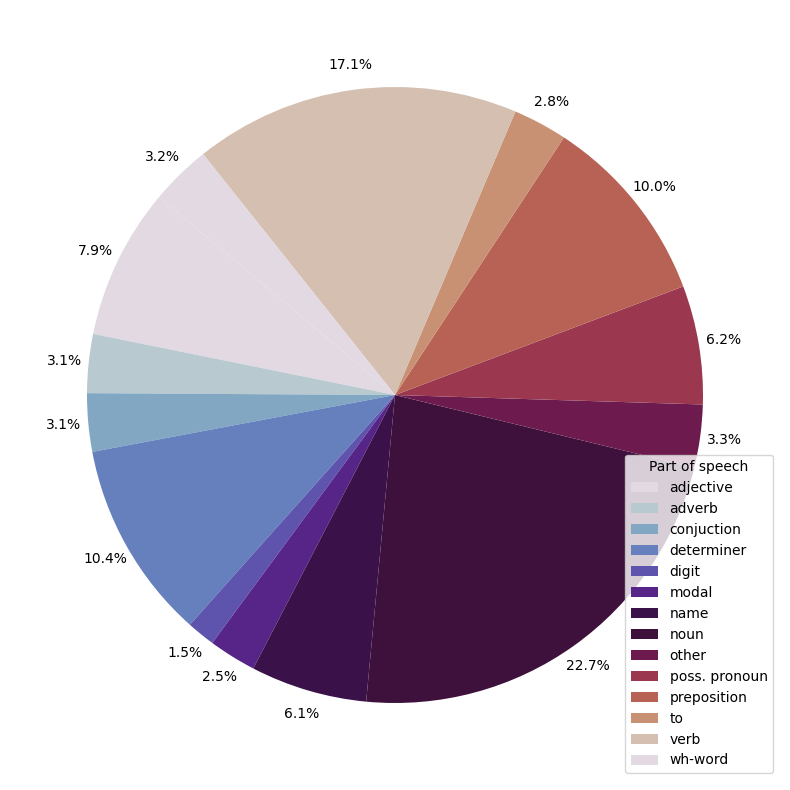

In [115]:
drawable_df = copy.copy(clean_df)
drawable_df.loc[drawable_df['prct'] < 0.01, 'tag'] = "other"
drawable_df.loc[drawable_df['prct'] < 0.01, 'gen_tag'] = "other"
drawable_df.loc[drawable_df['prct'] < 0.01, 'description'] = "other"
drawable_df = drawable_df.groupby(['gen_tag'])['count'].sum().reset_index()
display(drawable_df.sort_values('count', ascending=False))

cmap = plt.cm.twilight
colors = cmap(np.linspace(0, 1, len(drawable_df)))

ax = drawable_df.plot.pie(y='count', labels=[''] * len(drawable_df), autopct='%1.1f%%',
                          startangle=140, figsize=(10, 10), colors=colors,  legend=True)

ax.legend(drawable_df['gen_tag'], title='Part of speech', loc="lower right")

autotexts = [text for text in ax.texts if '%' in text.get_text()]

for autotext in autotexts:
    pos = autotext.get_position()
    x = pos[0] * 1.8  # Move outwards by 10%
    y = pos[1] * 1.8
    autotext.set_position((x, y))

ax.set_ylabel('')

50


Text(0.5, 0, 'Conversation length (prompts per conversation)')

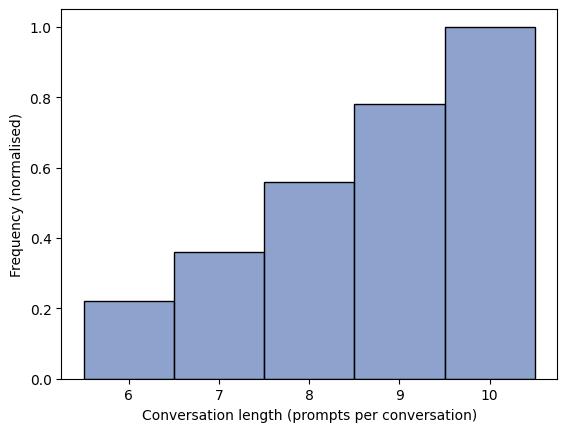

In [179]:
# Conversation sizes

conversation_lengths = [len(conv) for conv in conversations]
print(len(conversation_lengths))

cmap = plt.cm.twilight
colors = cmap(np.linspace(0, 1, 10))

sns.histplot(conversation_lengths, cumulative=True, discrete=True, stat='density', element='bars',
             fill=True, color=colors[2])

plt.ylabel('Frequency (normalised)')
plt.xlabel('Conversation length (prompts per conversation)')

Text(0.5, 0, 'Prompt length (words per prompt)')

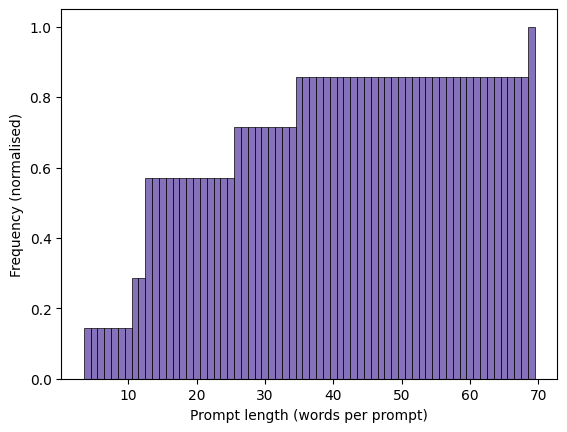

In [172]:
words_per_prompt = [len(dc['tokens']) for dc in data_conv]

cmap = plt.cm.twilight
colors = cmap(np.linspace(0, 1, 10))

sns.histplot(words_per_prompt, cumulative=True, discrete=True, stat='density', element='bars',
             fill=True, color=colors[3])
plt.ylabel('Frequency (normalised)')
plt.xlabel('Prompt length (words per prompt)')